### Задача F3|Cmax (Flowshop Scheduling Problem с тремя машинами и целью минимизации максимального времени завершения) формулируется следующим образом:

### Дано:

### Множество задач $J = {1, 2, ..., n}$, где $n$ - количество задач.
### Множество машин $M = {1, 2, 3}$, где $3$ - количество машин.
### Времена обработки $p_{ij}$, где $i \in J$ и $j \in M$, представляют собой время, необходимое для обработки задачи $i$ на машине $j$.
### Цель:
### Минимизировать максимальное время завершения (makespan) для данного расписания.

### Переменные решения:
### Последовательность задач на каждой из машин, то есть перестановки для каждой машины.
### Ограничения:

### Каждая задача должна быть обработана на каждой машине ровно один раз.
### Задачи выполняются последовательно на каждой машине.
### Целевая функция (makespan):

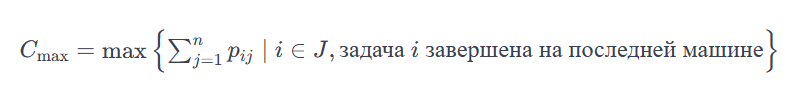

In [14]:
import random

### Эта функция генерирует случайное начальное решение, представляющее собой перестановку задач на машинах.
### Принимает на вход количество задач n.
### Возвращает список, представляющий случайную перестановку задач.

In [15]:
def generate_random_solution(n):
    return list(range(n))    

### Эта функция вычисляет значение целевой функции Cmax для заданной перестановки задач и времен обработки на машинах.
### Принимает на вход перестановку задач permutation и матрицу времен обработки processing_times.
### Возвращает значение Cmax для данной перестановки.

In [16]:
def calculate_cmax(permutation, processing_times):
    machines = len(processing_times)
    jobs = len(permutation)
    schedule = [[0] * machines for _ in range(jobs)]
    for j in range(jobs):
        for m in range(machines):
            if j == 0 and m == 0:
                schedule[j][m] = processing_times[m][permutation[j]]
            elif j == 0:
                schedule[j][m] = schedule[j][m - 1] + processing_times[m][permutation[j]]
            elif m == 0:
                schedule[j][m] = schedule[j - 1][m] + processing_times[m][permutation[j]]
            else:
                schedule[j][m] = max(schedule[j][m - 1], schedule[j - 1][m]) + processing_times[m][permutation[j]]

    return schedule[jobs - 1][machines - 1]

### Эта функция выполняет операцию кроссовера между двумя родителями (перестановками задач).
### Принимает на вход две перестановки родителей parent1 и parent2.
### Возвращает две новые перестановки потомков.

In [17]:
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + [gene for gene in parent2 if gene not in parent1[:point]]
    child2 = parent2[:point] + [gene for gene in parent1 if gene not in parent2[:point]]
    return child1, child2

### Эта функция выполняет операцию мутации для данной перестановки задач.
### Принимает на вход перестановку задач solution.
### Возвращает мутированную перестановку.

In [18]:
def mutate(solution):
    idx1, idx2 = random.sample(range(len(solution)), 2)
    solution[idx1], solution[idx2] = solution[idx2], solution[idx1]
    return solution

### Эта функция реализует алгоритм локального поиска для задачи F3|Cmax.
### Принимает на вход начальное решение initial_solution, матрицу времен обработки processing_times и максимальное количество итераций max_iterations.
### Возвращает оптимальное решение и соответствующее значение Cmax после проведения локального поиска.

In [19]:
def genetic_algorithm(processing_times, population_size=50, generations=1000):
    jobs = len(processing_times[0])
    population = [generate_random_solution(jobs) for _ in range(population_size)]
    for generation in range(generations):
        population = sorted(population, key=lambda x: calculate_cmax(x, processing_times))
        elite = population[:int(0.1 * population_size)]
        offspring = []
        while len(offspring) < population_size - len(elite):
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = crossover(parent1, parent2)
            offspring.extend([child1, child2])
        offspring = [mutate(individual) for individual in offspring]
        population = elite + offspring
    best_solution = min(population, key=lambda x: calculate_cmax(x, processing_times))
    best_cmax = calculate_cmax(best_solution, processing_times)
    return best_solution, best_cmax

In [20]:
random.seed(42)
jobs = 5
machines = 3
processing_times = [[2, 3, 1], [1, 2, 4], [3, 1, 2], [2, 4, 3], [4, 2, 1]]
best_solution, best_cmax = genetic_algorithm(processing_times)
print("Оптимальная перестановка:", best_solution)
print("Оптимальное Cmax:", best_cmax)

Оптимальная перестановка: [0, 1, 2]
Оптимальное Cmax: 17
